<a href="https://colab.research.google.com/github/rharris9/SYSM578/blob/main/rharris_Deep_Learning_dimensionality_eduction_with_Autoencoders_(Review).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning is an effiicent approach to classification and Regression, but since we already covered that in previous tutorials, we will now apply Deep Learning to dimensionality reduction.

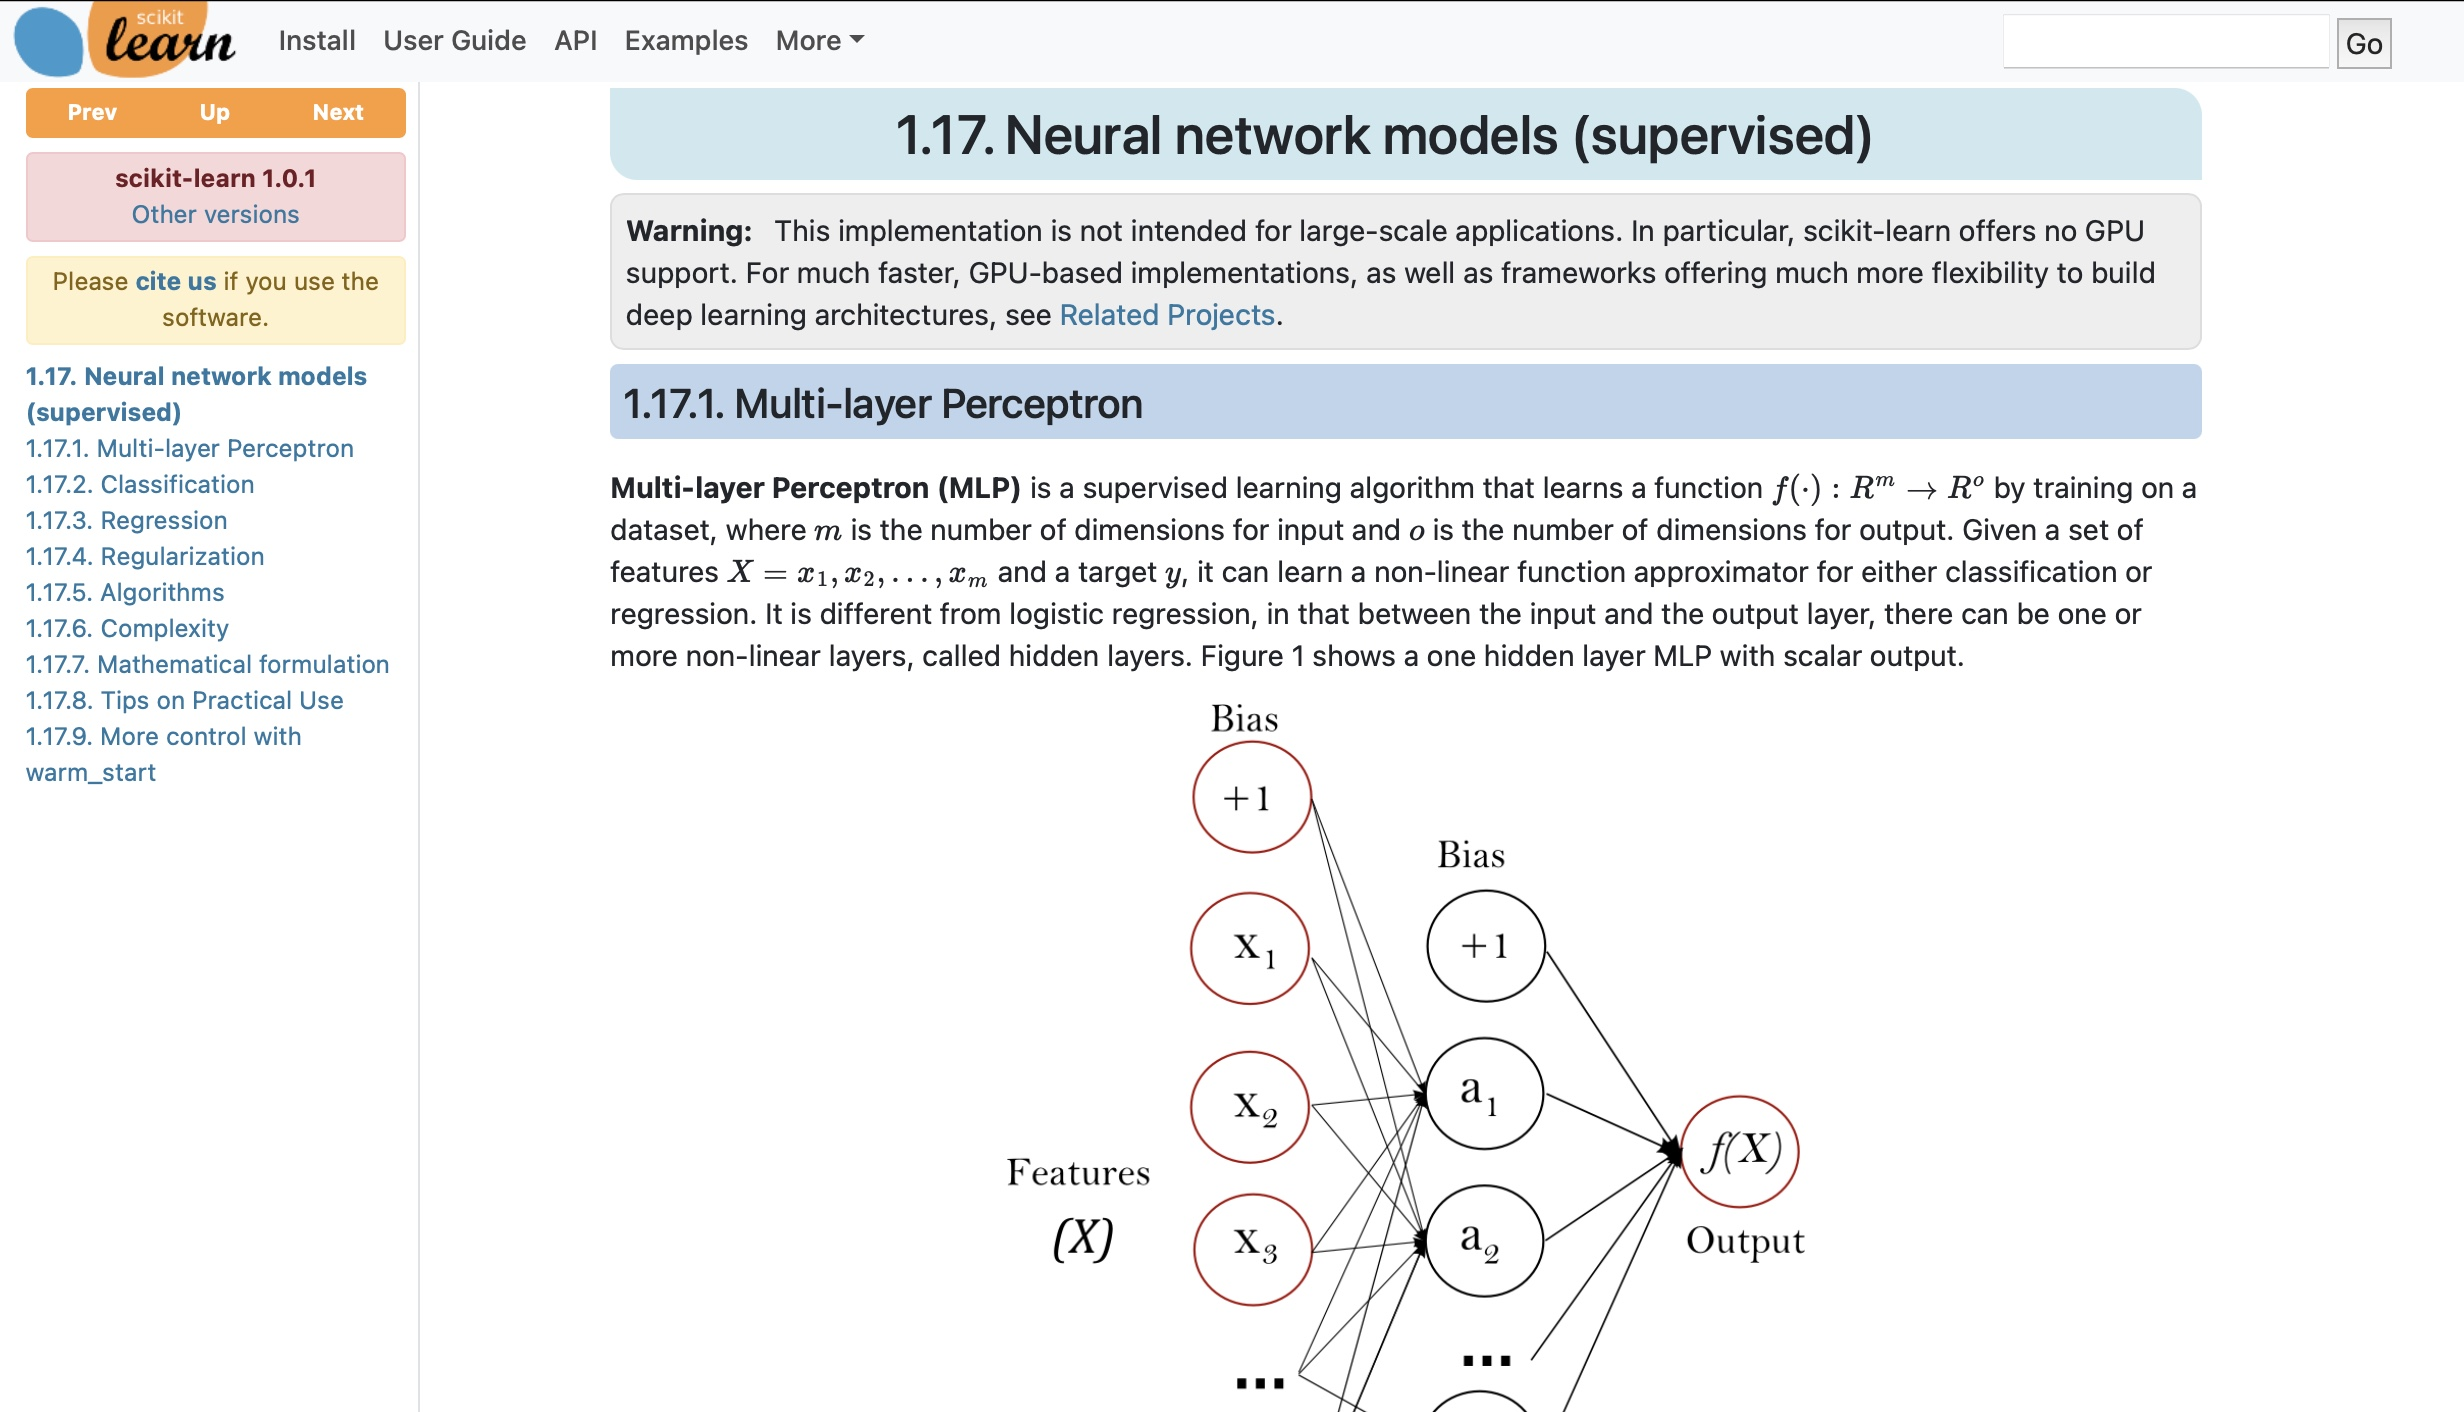

TO do so, we will use the SKlearn library
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

There you have a brief overview of models and methods used in this example.

First, let's load packages:

In [1]:
import pandas as pd
import numpy as np
import sys
import csv
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier as ANN

In [2]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_table('https://raw.githubusercontent.com/PineBiotech/omicslogic/master/CellLines_52samples_ExprData_T1.txt',sep='\t',header=(0)) 

#Prepare the data
#  Get the feature names (first column)
features = data.iloc[1:, 0].values 
# Transpose data so the rows are samples and columns are features
dataT = np.transpose(data)
#grab the first row for the header
new_header = dataT.iloc[0] 
#take the data less the header row
dataT = dataT[1:]
#set the header row as the df header
dataT.columns = new_header

# Before feeding the data into the AutoEncoder the data must definitely be 
# scaled between 0 and 1 using MinMaxScaler since we are going to use sigmoid 
# activation function in the output layer which outputs values between 0 and 1.

standard_scaler = MinMaxScaler()
dataT_scaled = pd.DataFrame(
                standard_scaler.fit_transform(dataT.iloc[:,1:]),
                columns=dataT.iloc[:,1:].columns
                )

# First column is sample classes exclude it from the data
X_scaled = dataT_scaled.values 
X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values 
#get all class names 
classes = np.unique(y) 

In [3]:
dataT.head()

id,class,ENSG00000000419,ENSG00000001036,ENSG00000001084,ENSG00000001497,ENSG00000001617,ENSG00000001630,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000269871,ENSG00000269893,ENSG00000269897,ENSG00000269900,ENSG00000269968,ENSG00000270016,ENSG00000270149,ENSG00000270161,ENSG00000270168,ENSG00000270170
184A1,Normal-like,6.06,4.47,4.47,5.27,6.05,6.24,4.17,6.55,5.19,...,7.34,7.89,5.4,5.28,5.74,0.04,4.39,4.09,2.17,3.99
184B5,Normal-like,5.25,5.39,6,4.27,7.31,5.26,3.51,7.49,4.54,...,7.53,8.44,5.19,0,5.92,0,4.98,3.9,1.6,4.65
21MT1,Basal,5.15,5.28,5.77,6.58,3.99,5.67,3.86,5.69,4.64,...,7.43,4.7,5.27,5.99,1.91,0,4.78,6.49,2.7,5.92
21NT,Basal,5.36,5.82,5.76,5.54,5.93,6.11,5.12,5,4.64,...,7.61,5.24,5.54,7.25,2.1,0.16,5.07,6.22,3.12,5.89
21PT,Basal,5.22,5.75,5.76,5.57,5.98,5.77,4.75,4.9,4.81,...,7.57,4.8,5.33,7.6,2.66,0,4.81,6.35,3.79,5.97


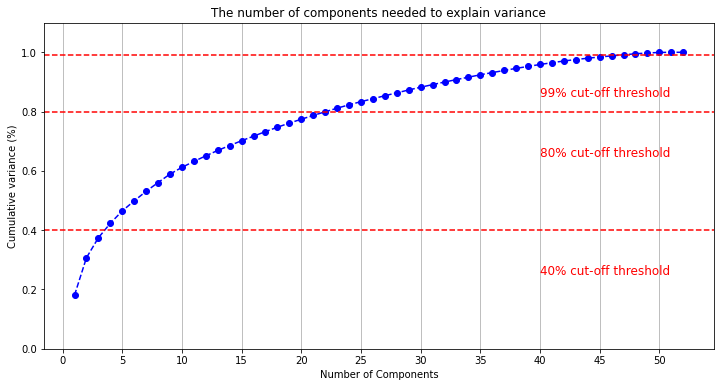

In [4]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 53, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 52, step=5)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.99, color='r', linestyle='--')
plt.text(40, 0.85, '99% cut-off threshold', color = 'red', fontsize=12)

plt.axhline(y=0.80, color='r', linestyle='--')
plt.text(40, 0.65, '80% cut-off threshold', color = 'red', fontsize=12)

plt.axhline(y=0.40, color='r', linestyle='--')
plt.text(40, 0.25, '40% cut-off threshold', color = 'red', fontsize=12)


ax.grid(axis='x')
plt.show()

In [5]:
pca = PCA(n_components=0.80)
projected = pca.fit_transform(dataT.iloc[:, 1:])
print(X.shape)
print(projected.shape)
print(pca.explained_variance_ratio_)


(52, 6916)
(52, 23)
[0.18082611 0.12618462 0.06745249 0.04872959 0.04182815 0.03381678
 0.03231465 0.02957703 0.02843842 0.02281979 0.01986524 0.01887957
 0.01833818 0.01645179 0.0161946  0.01544083 0.01535949 0.01478037
 0.01400287 0.01292586 0.01276202 0.01241193 0.01205207]


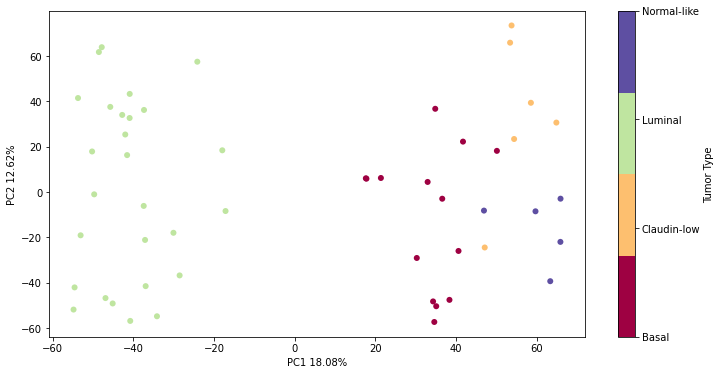

In [6]:
import matplotlib.cm as cm
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(classes)
y_encod = le.transform(y)
#display(classes, "Encoded as", le.transform(classes))

plt.scatter(projected[:, 0], projected[:, 1],
            c=y_encod, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 4))
plt.xlabel('PC1 {:0.2f}%'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 {:0.2f}%'.format(pca.explained_variance_ratio_[1]*100))
#plt.colorbar();
cb = plt.colorbar(ticks=range(4), label='Tumor Type')
cb.ax.set_yticklabels(classes)
plt.show()


In [ ]:
for activation_f in ['relu', 'tanh']:
  train_auto_test(activation_f, 500, 'sgd') 

In [7]:
dataT_scaled.head()

id,ENSG00000000419,ENSG00000001036,ENSG00000001084,ENSG00000001497,ENSG00000001617,ENSG00000001630,ENSG00000001631,ENSG00000002330,ENSG00000002549,ENSG00000002586,...,ENSG00000269871,ENSG00000269893,ENSG00000269897,ENSG00000269900,ENSG00000269968,ENSG00000270016,ENSG00000270149,ENSG00000270161,ENSG00000270168,ENSG00000270170
0,0.536517,0.158784,0.459397,0.456081,0.744713,0.562353,0.490281,0.724340,0.416107,0.573850,...,0.674510,0.852941,0.785366,0.540430,0.617204,0.006568,0.696825,0.449541,0.282552,0.297003
1,0.308989,0.469595,0.814385,0.118243,0.935045,0.331765,0.347732,1.000000,0.197987,0.430993,...,0.749020,1.000000,0.734146,0.000000,0.636559,0.000000,0.790476,0.405963,0.208333,0.476839
2,0.280899,0.432432,0.761021,0.898649,0.433535,0.428235,0.423326,0.472141,0.231544,0.343826,...,0.709804,0.000000,0.753659,0.613101,0.205376,0.000000,0.758730,1.000000,0.351563,0.822888
3,0.339888,0.614865,0.758701,0.547297,0.726586,0.531765,0.695464,0.269795,0.231544,0.486683,...,0.780392,0.144385,0.819512,0.742068,0.225806,0.026273,0.804762,0.938073,0.406250,0.814714
4,0.300562,0.591216,0.758701,0.557432,0.734139,0.451765,0.615551,0.240469,0.288591,0.457627,...,0.764706,0.026738,0.768293,0.777892,0.286022,0.000000,0.763492,0.967890,0.493490,0.836512


In [8]:
# Import train_test_split and create test and train datasets 
from sklearn.model_selection import train_test_split 
import collections
# Here test set will be 40% of all data 
# Data not scaled since Random Forest can work with unscaled data also
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=15, stratify=y) 
display("Train data", collections.Counter(y_train))
display("Test data", collections.Counter(y_test))

'Train data'

Counter({'Basal': 8, 'Luminal': 16, 'Claudin-low': 4, 'Normal-like': 3})

'Test data'

Counter({'Basal': 6, 'Luminal': 11, 'Normal-like': 2, 'Claudin-low': 2})

In [36]:
def train_auto_test(activation_type, encoding_dim, opt):

  ncol = X_train.shape[1]
  input_dim = Input(shape = (ncol, ))

  # Encoder Layers
  encoded = Dense(500, activation = activation_type)(input_dim)
  encoded = Dropout(0.5)(encoded) #DROUPOUT
  encoded = Dense(400, activation = activation_type)(encoded)
  encoded = Dense(250, activation = activation_type)(encoded)
  encoded = Dense(100, activation = activation_type)(encoded)
  encoded = Dense(50, activation = activation_type)(encoded)
  encoded = Dense(encoding_dim, activation = activation_type)(encoded) # BOTTLENECK LAYER

  # Decoder Layers
  decoded = Dense(50, activation = activation_type)(encoded)
  decoded = Dense(100, activation = activation_type)(encoded)
  decoded = Dense(200, activation = activation_type)(encoded)
  decoded = Dense(300, activation = activation_type)(encoded)
  decoded = Dense(500, activation = activation_type)(decoded)
  decoded = Dense(ncol, activation = activation_type)(decoded)

  # Combine Encoder and Deocder layers
  autoencoder = Model(inputs = input_dim, outputs = decoded)

  # Compile the Model
  autoencoder.compile(optimizer = opt , loss = 'binary_crossentropy', metrics=['mae'])
  autoencoder.fit(X_train, X_train, epochs = 100,verbose=0, batch_size = 50, shuffle = True, validation_data = (X_test, X_test))
  encoder = Model(inputs = input_dim, outputs = encoded) #ASSIGN BOTTLENECK LAYER DATA AS OUTPUT
  encoded_input = Input(shape = (encoding_dim, ))

  #print(history.history.keys())
  # summarize history for accuracy
  plt.plot(autoencoder.history.history['mae'])
  plt.plot(autoencoder.history.history['val_mae'])
  plt.title('Mean Absolute Error')
  plt.ylabel('MAE')
  plt.xlabel('epoch cycles')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Prediction
  encoded_train = pd.DataFrame(encoder.predict(X_train))
  encoded_train = encoded_train.add_prefix('feature_')
  encoded_test = pd.DataFrame(encoder.predict(X_test))
  encoded_test = encoded_test.add_prefix('feature_')

  encoded_train['id'] = y_train
  encoded_train = encoded_train.set_index('id')

  encoded_test['id'] = y_test
  encoded_test = encoded_test.set_index('id')

  X_encoded = pd.concat([encoded_train,encoded_test])

  #PCA
  pca = PCA(n_components=0.80)
  projected = pca.fit_transform(X_encoded.iloc[:, 1:])
  y = list(X_encoded.index)
  le = preprocessing.LabelEncoder()
  le.fit(classes)
  y_encod = le.transform(y)

  plt.scatter(projected[:, 0], projected[:, 1],
            c=y_encod, edgecolor='none', alpha=1,
            cmap=plt.cm.get_cmap('Spectral', 4))
  plt.xlabel('PC1 {:0.2f}%'.format(pca.explained_variance_ratio_[0]*100))
  plt.ylabel('PC2 {:0.2f}%'.format(pca.explained_variance_ratio_[1]*100))
  #plt.colorbar();
  cb = plt.colorbar(ticks=range(4), label='Tumor Type')
  cb.ax.set_yticklabels(classes)
  plt.show()

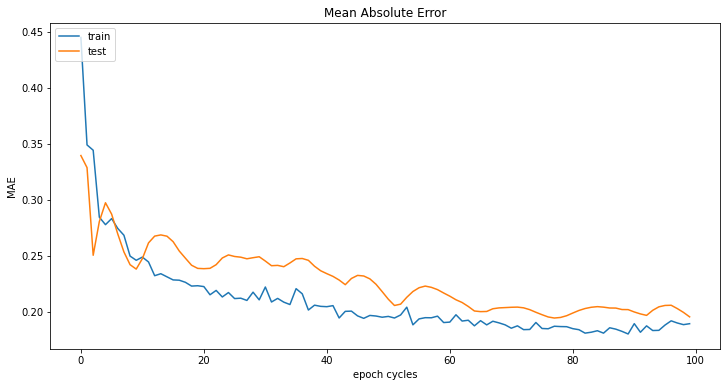

1/1 [==============================] - 0s 26ms/step


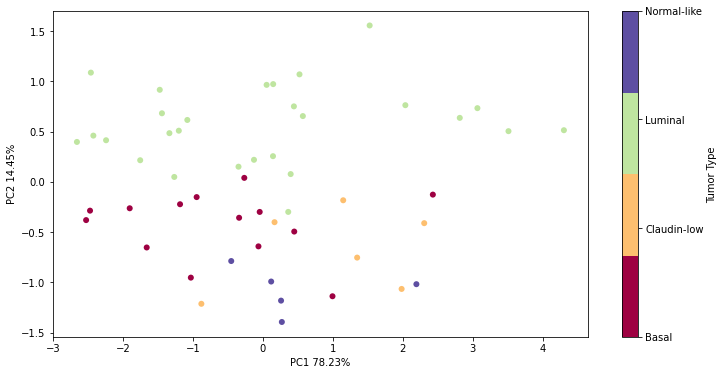

In [14]:
train_auto_test('relu', 50) #w/ decodder

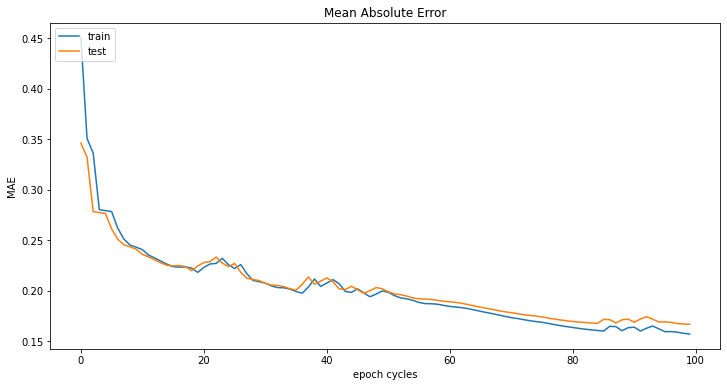

1/1 [==============================] - 0s 22ms/step


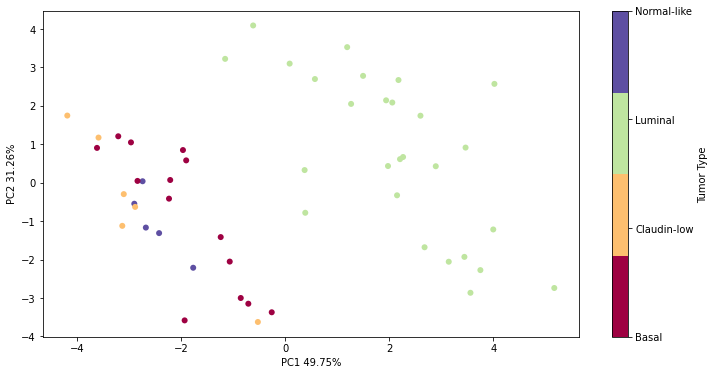

In [12]:
train_auto_test('relu', 50) #w/o decoder

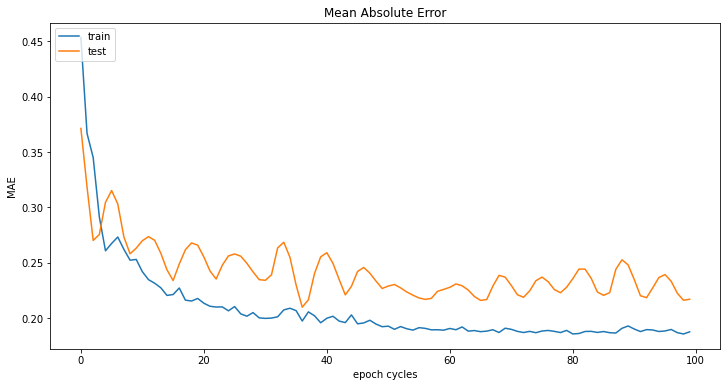

1/1 [==============================] - 0s 33ms/step


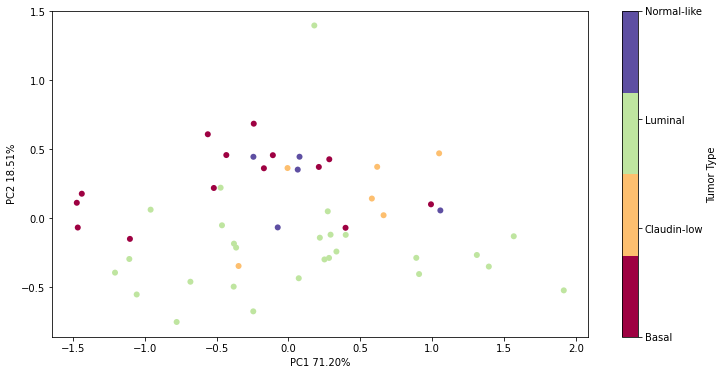

In [38]:
train_auto_test('relu', 500) #layers added

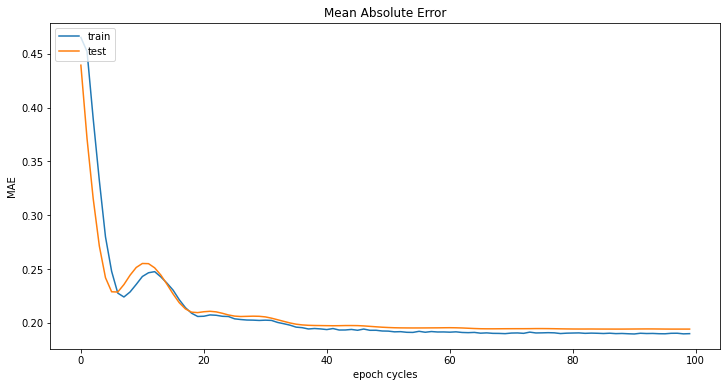

1/1 [==============================] - 0s 25ms/step


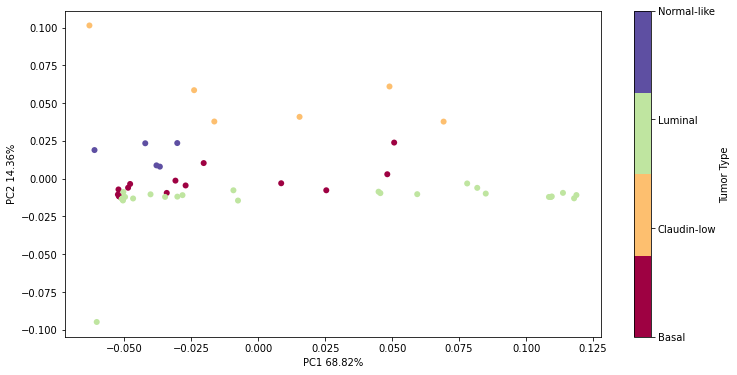

In [39]:
train_auto_test('tanh', 500) #layers added

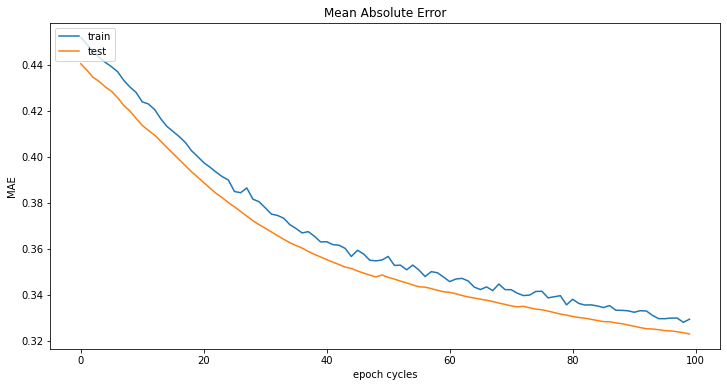

1/1 [==============================] - 0s 27ms/step


IndexError: ignored

In [33]:
for activation_f in ['relu', 'tanh']:
  train_auto_test(activation_f, 500, 'sgd') 

# Assignment              
The above example demonstrates how effectively autoencoders can be used to learn underlying correlations among data and represent data in a smaller dimension. The autoencoders works by estimating a lower dimensional representation of input data using an encoder network. The decoder network that is a mirrored representation of the encoder network  then decodes the encoding to recreate the input data. 

**Associated study:**
Gao, H., Korn, J. M., Ferretti, S., Monahan, J. E., Wang, Y., Singh, M., et al. (2015). High-throughput screening using patient-derived tumor xenografts to predict clinical trial drug response. Nature Medicine, 21(11), 1318–1325. http://doi.org/10.1038/nm.3954

Provided herewith are genomic profiles (gene expression, gene mutation and copy number variation) data for patient-derived Xenograft (PDXs) models of breast cancer and lung cancer. The treatment responses of these PDXs for the drug paclitaxel is included in the Data1 and for the drug binimetinib is included in the Data2.

Data1 Genomic profiles for Paclitaxel response:
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/pdx_Gao_et_al_rna_fpkm_paclitaxel.tsv
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/pdx_Gao_et_al_copy_number_paclitaxel.tsv
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/pdx_Gao_et_al_gene_mutn_paclitaxel.tsv

Data2 Genomic profiles for Binimetinib response:
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/pdx_Gao_et_al_rna_fpkm_binimetinib.tsv
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/pdx_Gao_et_al_copy_number_binimetinib.tsv
https://raw.githubusercontent.com/PineBiotech/omicslogic/master/pdx_Gao_et_al_gene_mutn_binimetinib.tsv

Ref: Genomic profiles data filtered and subcategorized from https://www.nature.com/articles/nm.3954

Apply the above auto encoder algorithm to reduce the dimensions for the genomic profiles separately Data1 and for Data2.
Employ an SVM classifier on reduced dimensions of Data1 and Data2 to classify the PDXs to

a) Different tumor types (binary classification).

b) Treatment responses (multinomial classification).

Find out which of the three genomic profiles is the better predictor for the above two cases.
